# CNN with MNIST DATASET

### Import Settings

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


### Making Test,Validate and Train Sets

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.2), random_state=42)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)


(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,) (10000, 28, 28, 1) (10000,)


### Model Parameters

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model and Loss and Accuracy Graphs

In [20]:

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1981 - accuracy: 0.9402 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 2/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.0676 - val_accuracy: 0.9789
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0544 - val_accuracy: 0.9823
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0552 - val_accuracy: 0.9845
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0515 - val_accuracy: 0.9871
Epoch 7/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.0544 - 

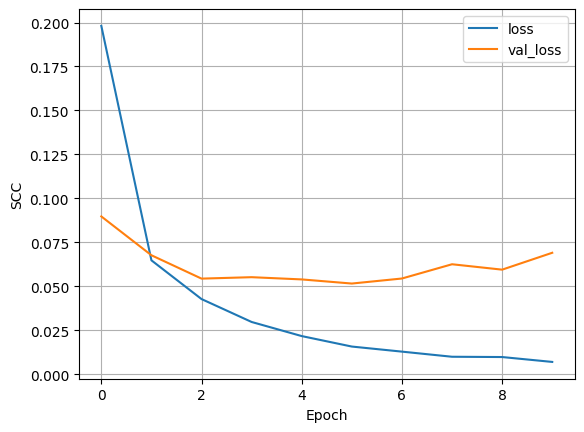

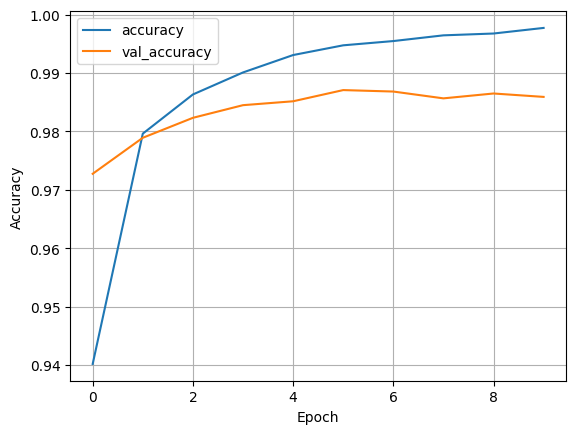

In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'],label="loss")
    plt.plot(history.history['val_loss'],label="val_loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("SCC")
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label="accuracy")
    plt.plot(history.history['val_accuracy'],label="val_accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
plot_loss(history)
plot_accuracy(history)


### Report Section

In [22]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred.argmax(axis=1)))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       1.00      0.96      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                346176    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

### Checking what it got wrong

In [24]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i].argmax():
        #plt.imshow(x_test[i].reshape(28, 28))
        #plt.title(f"True: {y_test[i]}, Predict: {y_pred[i].argmax()}")
        #plt.show()
        count+=1
print(count)



165


### Save Model & Summary

In [25]:
model.save("model.keras")
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                346176    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

### Custom Tests using the model

1/1 [==============================] - 0s 22ms/step
The predicted class is: 5


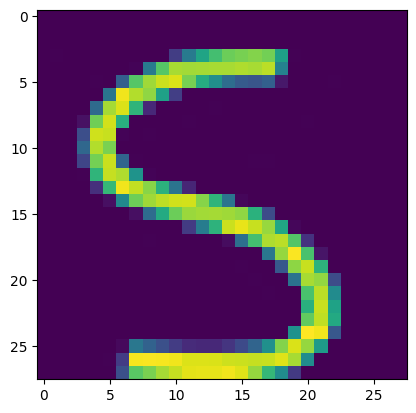

In [26]:
from PIL import Image
image = Image.open('number_3.jpeg').convert('L')
image = image.resize((28, 28))

image_array = np.array(image)

image_array = image_array / 255.0

image_array = image_array.reshape(1, 28, 28, 1)

prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)

print(f'The predicted class is: {predicted_class}')

plt.imshow(image_array.reshape(28, 28))
plt.show()

### Export Weights and Biases

In [28]:
for layer in model.layers:
        if layer.get_weights() != []:
            np.savetxt("Weights_Biases/"+layer.name + ".csv", layer.get_weights()[0].flatten(), delimiter=",")
            np.savetxt("Weights_Biases/"+layer.name + "_bias.csv", layer.get_weights()[1].flatten(), delimiter=",")
            

In [33]:
def float_to_fixed_point(value, integer_bits=2, fractional_bits=14):
    scale_factor = 2 ** fractional_bits
    max_value = (2 ** (integer_bits + fractional_bits - 1)) - 1
    min_value = -(2 ** (integer_bits + fractional_bits - 1))
    
    fixed_point_value = int(round(value * scale_factor))
    if fixed_point_value > max_value:
        fixed_point_value = max_value
    elif fixed_point_value < min_value:
        fixed_point_value = min_value
    
    return fixed_point_value

def save_fixed_point_binary(values, filename):
    with open(filename, 'w') as f:
        for value in values:
            fixed_point_value = float_to_fixed_point(value)
            binary_value = format(fixed_point_value & 0xFFFF, '016b')
            f.write(binary_value + '\n')


for layer in model.layers:
    if layer.get_weights() != []:
        weights, biases = layer.get_weights()
        
        weights_filename = f"Bin_Float_WB/{layer.name}_weights.bin"
        biases_filename = f"Bin_Float_WB/{layer.name}_biases.bin"
        
        save_fixed_point_binary(weights.flatten(), weights_filename)
        save_fixed_point_binary(biases.flatten(), biases_filename)